In [1]:
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf

C:\Users\sarua\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [4]:
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
pd.set_option('display.max_columns',250) #for displaying all the column value


# Converting CSV to DataFrame


In [7]:
column_names = [
'duration',
'protocol_type',
'service',
'flag',
'src_bytes',
'dst_bytes',
'land',
'wrong_fragment',
'urgent',
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds',
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
'outcome'
]

df = pd.read_csv(r"C:\Users\sarua\Downloads\csc215_mini\network_intrusion_data.csv",encoding = 'ISO-8859-1',header=None,names=column_names)


In [8]:
df[:5]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [9]:
df.outcome.unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [10]:
df.shape

(494021, 42)

In [11]:
df_clean =df.dropna() #drop any null value row

In [12]:
df_clean.shape

(494021, 42)

In [13]:
df_unique = df_clean.drop_duplicates(keep='first', inplace=False) #removing dulicates

In [14]:
df_unique.shape

(145586, 42)

In [15]:
def binary_label_encoding(label):
    if label=='normal.':
        return 0
    else:
        return 1
    

In [16]:
df_unique['binary_label']=df_unique.outcome.apply(binary_label_encoding)

C:\Users\sarua\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
df_unique.shape

(145586, 43)

In [18]:
y_binary = df_unique['binary_label'].tolist()

In [19]:
y_binary = np.array(y_binary)

In [20]:
y_binary.shape

(145586,)

In [21]:
y_binary

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [23]:
outcome_list = df_unique['outcome'].tolist()

In [24]:
len(outcome_list)

145586

In [25]:
y_multilabel = le.fit_transform(outcome_list)

In [26]:
le.classes_

array(['back.', 'buffer_overflow.', 'ftp_write.', 'guess_passwd.',
       'imap.', 'ipsweep.', 'land.', 'loadmodule.', 'multihop.',
       'neptune.', 'nmap.', 'normal.', 'perl.', 'phf.', 'pod.',
       'portsweep.', 'rootkit.', 'satan.', 'smurf.', 'spy.', 'teardrop.',
       'warezclient.', 'warezmaster.'], dtype='<U16')

In [27]:
y_multilabel[1:5000]

array([11, 11, 11, ..., 11, 11, 11], dtype=int64)

In [28]:
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}_{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [29]:
def min_max_normalization(df,name):
    
    max_value = df[name].max()
    min_value = df[name].min()
    
    new_column = "{}_{}".format('normalized',name)
    
    df[new_column] = (df[name] - min_value) / (max_value - min_value)
    df.drop(name,axis=1,inplace = True)   
            

In [30]:
encode_text_dummy(df_unique,'protocol_type')

C:\Users\sarua\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\sarua\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [31]:
df_unique.shape

(145586, 45)

In [32]:
encode_text_dummy(df_unique,'service')

C:\Users\sarua\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\sarua\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [33]:
df_unique.shape

(145586, 110)

In [34]:
encode_text_dummy(df_unique,'flag')

C:\Users\sarua\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\sarua\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [35]:
df_unique.shape

(145586, 120)

In [36]:
encode_text_dummy(df_unique,'su_attempted')

C:\Users\sarua\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\sarua\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [37]:
df_unique.shape

(145586, 122)

In [38]:
df_unique[:5]

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,binary_label,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,su_attempted_0,su_attempted_1,su_attempted_2
0,0,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,0,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,0,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,0,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [39]:
numerical_features = ['duration','src_bytes','dst_bytes','wrong_fragment','urgent','hot','num_failed_logins',
'num_compromised','num_root','num_file_creations','num_shells','num_access_files','count',
'srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate']

In [40]:
df_unique.shape

(145586, 122)

In [41]:
for name in numerical_features:
    min_max_normalization(df_unique,name)
    

C:\Users\sarua\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sarua\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [42]:
df_unique.shape

(145586, 122)

In [43]:
df_unique[:5]

,land,logged_in,root_shell,num_outbound_cmds,is_host_login,is_guest_login,outcome,binary_label,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,su_attempted_0,su_attempted_1,su_attempted_2,normalized_duration,normalized_src_bytes,normalized_dst_bytes,normalized_wrong_fragment,normalized_urgent,normalized_hot,normalized_num_failed_logins,normalized_num_compromised,normalized_num_root,normalized_num_file_creations,normalized_num_shells,normalized_num_access_files,normalized_count,normalized_srv_count,normalized_serror_rate,normalized_srv_serror_rate,normalized_rerror_rate,normalized_srv_rerror_rate,normalized_same_srv_rate,normalized_diff_srv_rate,normalized_srv_diff_host_rate,normalized_dst_host_count,normalized_dst_host_srv_count,normalized_dst_host_same_srv_rate,normalized_dst_host_diff_srv_rate,normalized_dst_host_same_src_port_rate,normalized_dst_host_srv_diff_host_rate,normalized_dst_host_serror_rate,normalized_dst_host_srv_serror_rate,normalized_dst_host_rerror_rate,normalized_dst_host_srv_rerror_rate
0,0,1,0,0,0,0,normal.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,2.610418e-07,0.001057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015656,0.015656,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.035294,0.035294,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,1,0,0,0,0,normal.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,3.446905e-07,0.000094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015656,0.015656,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.074510,0.074510,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0,1,0,0,0,0,normal.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,3.389216e-07,0.000259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015656,0.015656,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.113725,0.113725,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0,1,0,0,0,0,normal.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,3.158461e-07,0.000259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011742,0.011742,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.152941,0.152941,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0,1,0,0,0,0,normal.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,3.129617e-07,0.000394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011742,0.011742,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.192157,0.192157,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


In [44]:
del df_unique['is_host_login']

In [45]:
df_unique.shape

(145586, 121)

In [46]:
del df_unique['num_outbound_cmds']

In [47]:
df_unique.shape

(145586, 120)

In [48]:
df_outcome = df_unique[['outcome','binary_label']]

In [49]:
df_outcome.shape

(145586, 2)

In [50]:
df_unique.shape

(145586, 120)

In [51]:
del df_unique['outcome']


In [52]:
del df_unique['binary_label']

In [53]:
df_unique.shape

(145586, 118)

In [54]:
df_unique[:5]

,land,logged_in,root_shell,is_guest_login,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,su_attempted_0,su_attempted_1,su_attempted_2,normalized_duration,normalized_src_bytes,normalized_dst_bytes,normalized_wrong_fragment,normalized_urgent,normalized_hot,normalized_num_failed_logins,normalized_num_compromised,normalized_num_root,normalized_num_file_creations,normalized_num_shells,normalized_num_access_files,normalized_count,normalized_srv_count,normalized_serror_rate,normalized_srv_serror_rate,normalized_rerror_rate,normalized_srv_rerror_rate,normalized_same_srv_rate,normalized_diff_srv_rate,normalized_srv_diff_host_rate,normalized_dst_host_count,normalized_dst_host_srv_count,normalized_dst_host_same_srv_rate,normalized_dst_host_diff_srv_rate,normalized_dst_host_same_src_port_rate,normalized_dst_host_srv_diff_host_rate,normalized_dst_host_serror_rate,normalized_dst_host_srv_serror_rate,normalized_dst_host_rerror_rate,normalized_dst_host_srv_rerror_rate
0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,2.610418e-07,0.001057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015656,0.015656,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.035294,0.035294,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,3.446905e-07,0.000094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015656,0.015656,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.074510,0.074510,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,3.389216e-07,0.000259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015656,0.015656,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.113725,0.113725,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,3.158461e-07,0.000259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011742,0.011742,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.152941,0.152941,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,3.129617e-07,0.000394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011742,0.011742,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.192157,0.192157,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


In [55]:
X=df_unique.as_matrix(columns=None)

C:\Users\sarua\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [56]:
X.shape

(145586, 118)

In [57]:
y_binary.shape

(145586,)

# Train Test Split

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y_binary,test_size=0.20,random_state=1)

# Train Models

In [59]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Model Evaluation

In [60]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

test :  [0 1 0 1 0 1 0 0 0 1]
pred :  [0 1 0 1 0 1 0 0 0 1]

[[17451   108]
 [  272 11287]]

Precision Score::  0.9905221588415972
Recall Score   ::  0.9764685526429622
F1 Score       ::  0.9834451511719091

Plotting confusion matrix


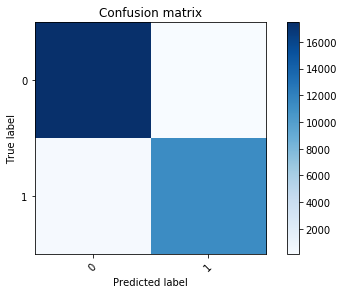


             precision    recall  f1-score   support

          0       0.98      0.99      0.99     17559
          1       0.99      0.98      0.98     11559

avg / total       0.99      0.99      0.99     29118



In [61]:
y_pred_lr = clf_lr.predict(X_test)

print("test : ", y_test[:10])
print("pred : ", y_pred_lr[:10])

print()

cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

print()

print("Precision Score:: ",metrics.precision_score(y_test,y_pred_lr))   
print("Recall Score   :: ",metrics.recall_score(y_test,y_pred_lr))      
print("F1 Score       :: ",metrics.f1_score(y_test,y_pred_lr)) 

print()

print('Plotting confusion matrix')
plt.figure()
plot_confusion_matrix(cm_lr, clf_lr.classes_)
plt.show()

print()

print(classification_report(y_test, y_pred_lr))

# Neural Network model

In [62]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [63]:
# columns
columns_new = ['y']

# pass in array and columns
dataframe_y = pd.DataFrame(y_binary , columns=columns_new)

In [64]:
encode_text_dummy(dataframe_y,'y')

In [65]:
y_tns_binary = dataframe_y.values

In [66]:
y_tns_binary.shape

(145586, 2)

In [67]:
X_tns_train,X_tns_test,y_tns_train,y_tns_test = train_test_split(X,y_tns_binary,test_size=0.20,random_state=1)

In [68]:
checkpointer = ModelCheckpoint(filepath=r"C:\Users\sarua\Downloads\csc215_mini\mini3\network_best.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model_classification = Sequential()
    model_classification.add(Dense(50,input_dim=X_tns_train.shape[1], activation='relu')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_classification.add(Dense(50,activation='relu')) # Hidden 2
    model_classification.add(Dense(y_tns_train.shape[1],activation='softmax')) # Output
    model_classification.compile(loss='categorical_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification.fit(X_tns_train, y_tns_train,validation_data=(X_tns_test,y_tns_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)


0
Train on 116468 samples, validate on 29118 samples
Epoch 1/1000
 - 8s - loss: 0.0340 - val_loss: 0.0169
Epoch 2/1000
 - 7s - loss: 0.0105 - val_loss: 0.0091
Epoch 3/1000
 - 7s - loss: 0.0072 - val_loss: 0.0085
Epoch 4/1000
 - 7s - loss: 0.0065 - val_loss: 0.0098
Epoch 5/1000
 - 7s - loss: 0.0058 - val_loss: 0.0085
Epoch 6/1000
 - 7s - loss: 0.0055 - val_loss: 0.0105
Epoch 7/1000
 - 7s - loss: 0.0050 - val_loss: 0.0086
Epoch 00007: early stopping
1
Train on 116468 samples, validate on 29118 samples
Epoch 1/1000
 - 8s - loss: 0.0329 - val_loss: 0.0132
Epoch 2/1000
 - 7s - loss: 0.0088 - val_loss: 0.0082
Epoch 3/1000
 - 7s - loss: 0.0069 - val_loss: 0.0084
Epoch 4/1000
 - 8s - loss: 0.0061 - val_loss: 0.0083
Epoch 5/1000
 - 7s - loss: 0.0055 - val_loss: 0.0078
Epoch 6/1000
 - 7s - loss: 0.0050 - val_loss: 0.0077
Epoch 7/1000
 - 7s - loss: 0.0049 - val_loss: 0.0082
Epoch 00007: early stopping
2
Train on 116468 samples, validate on 29118 samples
Epoch 1/1000
 - 8s - loss: 0.0309 - val_los

Precision score : 0.9987002859370938
Recall score    : 0.997145081754477
F1 score        : 0.9979220779220779

[[17544    15]
 [   33 11526]]

Plotting confusion matrix


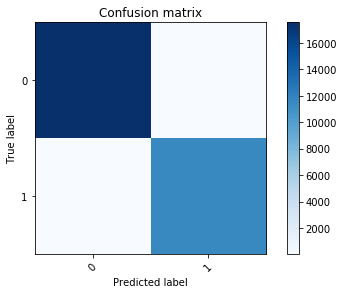

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     17559
          1       1.00      1.00      1.00     11559

avg / total       1.00      1.00      1.00     29118



In [70]:
model_classification.load_weights(r"C:\Users\sarua\Downloads\csc215_mini\mini3\network_best.hdf5")

pred = model_classification.predict(X_tns_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)
y_true= np.argmax(y_tns_test,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, clf_lr.classes_)
plt.show()

print(classification_report(y_true, pred))

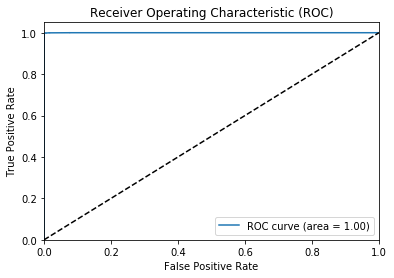

In [71]:
model_classification.load_weights(r"C:\Users\sarua\Downloads\csc215_mini\mini3\network_best.hdf5")

pred = model_classification.predict(X_tns_test)

pred = pred[:,1] # Only positive class (1)
plot_roc(pred,y_true)


In [72]:
checkpointer = ModelCheckpoint(filepath=r"C:\Users\sarua\Downloads\csc215_mini\mini3\network_best_1.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model_classification_1 = Sequential()
    model_classification_1.add(Dense(50,input_dim=X_tns_train.shape[1], activation='sigmoid')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_classification_1.add(Dense(50,activation='sigmoid')) # Hidden 2
    model_classification_1.add(Dense(y_tns_train.shape[1],activation='softmax')) # Output
    model_classification_1.compile(loss='categorical_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification_1.fit(X_tns_train, y_tns_train,validation_data=(X_tns_test,y_tns_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)


0
Train on 116468 samples, validate on 29118 samples
Epoch 1/1000
 - 9s - loss: 0.0676 - val_loss: 0.0445
Epoch 2/1000
 - 8s - loss: 0.0371 - val_loss: 0.0382
Epoch 3/1000
 - 9s - loss: 0.0339 - val_loss: 0.0419
Epoch 4/1000
 - 8s - loss: 0.0323 - val_loss: 0.0337
Epoch 5/1000
 - 9s - loss: 0.0306 - val_loss: 0.0322
Epoch 6/1000
 - 9s - loss: 0.0280 - val_loss: 0.0316
Epoch 7/1000
 - 8s - loss: 0.0250 - val_loss: 0.0283
Epoch 8/1000
 - 8s - loss: 0.0218 - val_loss: 0.0233
Epoch 9/1000
 - 8s - loss: 0.0185 - val_loss: 0.0212
Epoch 10/1000
 - 8s - loss: 0.0160 - val_loss: 0.0187
Epoch 11/1000
 - 7s - loss: 0.0137 - val_loss: 0.0156
Epoch 12/1000
 - 8s - loss: 0.0118 - val_loss: 0.0168
Epoch 13/1000
 - 10s - loss: 0.0108 - val_loss: 0.0127
Epoch 14/1000
 - 10s - loss: 0.0100 - val_loss: 0.0131
Epoch 15/1000
 - 8s - loss: 0.0095 - val_loss: 0.0115
Epoch 16/1000
 - 10s - loss: 0.0090 - val_loss: 0.0116
Epoch 17/1000
 - 9s - loss: 0.0084 - val_loss: 0.0113
Epoch 18/1000
 - 10s - loss: 0.0082

Precision score : 0.9986992715920916
Recall score    : 0.9963664676875162
F1 score        : 0.9975315057814733

[[17544    15]
 [   42 11517]]

Plotting confusion matrix


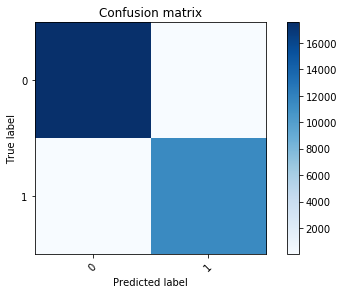

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     17559
          1       1.00      1.00      1.00     11559

avg / total       1.00      1.00      1.00     29118



In [73]:
model_classification_1.load_weights(r"C:\Users\sarua\Downloads\csc215_mini\mini3\network_best_1.hdf5")

pred = model_classification_1.predict(X_tns_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)
y_true= np.argmax(y_tns_test,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, clf_lr.classes_)
plt.show()

print(classification_report(y_true, pred))

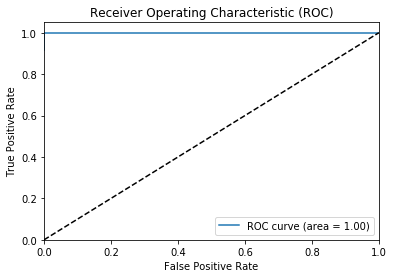

In [76]:
model_classification_1.load_weights(r"C:\Users\sarua\Downloads\csc215_mini\mini3\network_best_1.hdf5")

pred = model_classification_1.predict(X_tns_test)

pred = pred[:,1] # Only positive class (1)
plot_roc(pred,y_true)

In [77]:
checkpointer = ModelCheckpoint(filepath=r"C:\Users\sarua\Downloads\csc215_mini\mini3\network_best_2.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(3):
    print(i)
    model_classification_2 = Sequential()
    model_classification_2.add(Dense(50,input_dim=X_tns_train.shape[1], activation='tanh')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_classification_2.add(Dense(50,activation='tanh')) # Hidden 2
    model_classification_2.add(Dense(y_tns_train.shape[1],activation='softmax')) # Output
    model_classification_2.compile(loss='categorical_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification_2.fit(X_tns_train, y_tns_train,validation_data=(X_tns_test,y_tns_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)


0
Train on 116468 samples, validate on 29118 samples
Epoch 1/1000
 - 5s - loss: 0.0421 - val_loss: 0.0290
Epoch 2/1000
 - 4s - loss: 0.0197 - val_loss: 0.0231
Epoch 3/1000
 - 4s - loss: 0.0108 - val_loss: 0.0120
Epoch 4/1000
 - 4s - loss: 0.0086 - val_loss: 0.0112
Epoch 5/1000
 - 4s - loss: 0.0074 - val_loss: 0.0122
Epoch 6/1000
 - 3s - loss: 0.0068 - val_loss: 0.0089
Epoch 7/1000
 - 3s - loss: 0.0062 - val_loss: 0.0089
Epoch 8/1000
 - 3s - loss: 0.0060 - val_loss: 0.0075
Epoch 9/1000
 - 3s - loss: 0.0056 - val_loss: 0.0093
Epoch 10/1000
 - 5s - loss: 0.0053 - val_loss: 0.0077
Epoch 11/1000
 - 6s - loss: 0.0051 - val_loss: 0.0083
Epoch 12/1000
 - 4s - loss: 0.0050 - val_loss: 0.0083
Epoch 13/1000
 - 4s - loss: 0.0049 - val_loss: 0.0082
Epoch 00013: early stopping
1
Train on 116468 samples, validate on 29118 samples
Epoch 1/1000
 - 5s - loss: 0.0422 - val_loss: 0.0305
Epoch 2/1000
 - 5s - loss: 0.0216 - val_loss: 0.0147
Epoch 3/1000
 - 5s - loss: 0.0108 - val_loss: 0.0099
Epoch 4/1000
 

Precision score : 0.9985276286159709
Recall score    : 0.9974046197767973
F1 score        : 0.997965808266609

[[17542    17]
 [   30 11529]]

Plotting confusion matrix


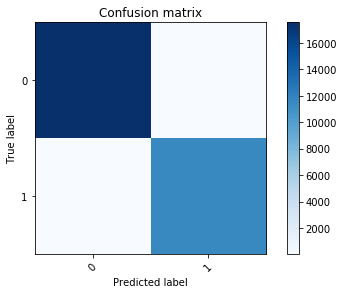

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     17559
          1       1.00      1.00      1.00     11559

avg / total       1.00      1.00      1.00     29118



In [78]:
model_classification_2.load_weights(r"C:\Users\sarua\Downloads\csc215_mini\mini3\network_best_2.hdf5")

pred = model_classification_2.predict(X_tns_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)
y_true= np.argmax(y_tns_test,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, clf_lr.classes_)
plt.show()

print(classification_report(y_true, pred))

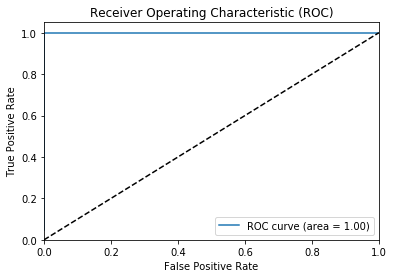

In [80]:
model_classification_2.load_weights(r"C:\Users\sarua\Downloads\csc215_mini\mini3\network_best_2.hdf5")

pred = model_classification_2.predict(X_tns_test)

pred = pred[:,1] # Only positive class (1)
plot_roc(pred,y_true)

In [81]:
checkpointer = ModelCheckpoint(filepath=r"C:\Users\sarua\Downloads\csc215_mini\mini3\network_best_3.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(3):
    print(i)
    model_classification_3 = Sequential()
    model_classification_3.add(Dense(50,input_dim=X_tns_train.shape[1], activation='relu')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_classification_3.add(Dense(50,activation='relu')) # Hidden 2
    model_classification_3.add(Dense(y_tns_train.shape[1],activation='softmax')) # Output
    model_classification_3.compile(loss='categorical_crossentropy', optimizer='sgd')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification_3.fit(X_tns_train, y_tns_train,validation_data=(X_tns_test,y_tns_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)


0
Train on 116468 samples, validate on 29118 samples
Epoch 1/1000
 - 4s - loss: 0.0808 - val_loss: 0.0557
Epoch 2/1000
 - 4s - loss: 0.0456 - val_loss: 0.0451
Epoch 3/1000
 - 4s - loss: 0.0385 - val_loss: 0.0394
Epoch 4/1000
 - 5s - loss: 0.0345 - val_loss: 0.0361
Epoch 5/1000
 - 4s - loss: 0.0318 - val_loss: 0.0340
Epoch 6/1000
 - 4s - loss: 0.0297 - val_loss: 0.0322
Epoch 7/1000
 - 5s - loss: 0.0279 - val_loss: 0.0319
Epoch 8/1000
 - 6s - loss: 0.0263 - val_loss: 0.0290
Epoch 9/1000
 - 9s - loss: 0.0250 - val_loss: 0.0278
Epoch 10/1000
 - 6s - loss: 0.0239 - val_loss: 0.0269
Epoch 11/1000
 - 4s - loss: 0.0229 - val_loss: 0.0264
Epoch 12/1000
 - 4s - loss: 0.0222 - val_loss: 0.0252
Epoch 13/1000
 - 4s - loss: 0.0213 - val_loss: 0.0247
Epoch 14/1000
 - 4s - loss: 0.0206 - val_loss: 0.0258
Epoch 15/1000
 - 4s - loss: 0.0199 - val_loss: 0.0226
Epoch 16/1000
 - 3s - loss: 0.0192 - val_loss: 0.0221
Epoch 17/1000
 - 4s - loss: 0.0186 - val_loss: 0.0216
Epoch 18/1000
 - 3s - loss: 0.0181 - v

Precision score : 0.9980077955825033
Recall score    : 0.99679903105805
F1 score        : 0.9974030470914127

[[17536    23]
 [   37 11522]]

Plotting confusion matrix


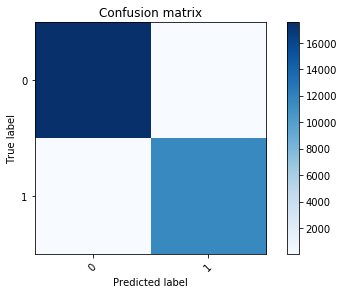

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     17559
          1       1.00      1.00      1.00     11559

avg / total       1.00      1.00      1.00     29118



In [84]:
model_classification_3.load_weights(r"C:\Users\sarua\Downloads\csc215_mini\mini3\network_best_3.hdf5")

pred = model_classification_3.predict(X_tns_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)
y_true= np.argmax(y_tns_test,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, clf_lr.classes_)
plt.show()

print(classification_report(y_true, pred))

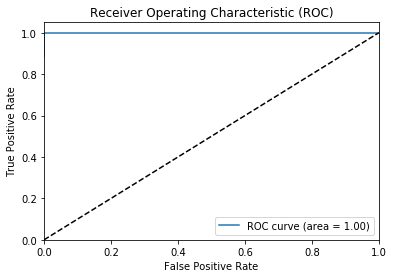

In [85]:
model_classification_3.load_weights(r"C:\Users\sarua\Downloads\csc215_mini\mini3\network_best_3.hdf5")

pred = model_classification_3.predict(X_tns_test)

pred = pred[:,1] # Only positive class (1)
plot_roc(pred,y_true)

In [86]:
checkpointer = ModelCheckpoint(filepath=r"C:\Users\sarua\Downloads\csc215_mini\mini3\network_best_4.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(3):
    print(i)
    model_classification_4 = Sequential()
    model_classification_4.add(Dense(50,input_dim=X_tns_train.shape[1], activation='sigmoid')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_classification_4.add(Dense(50,activation='sigmoid')) # Hidden 2
    model_classification_4.add(Dense(y_tns_train.shape[1],activation='softmax')) # Output
    model_classification_4.compile(loss='categorical_crossentropy', optimizer='sgd')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification_4.fit(X_tns_train, y_tns_train,validation_data=(X_tns_test,y_tns_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)


0
Train on 116468 samples, validate on 29118 samples
Epoch 1/1000
 - 4s - loss: 0.3565 - val_loss: 0.1264
Epoch 2/1000
 - 4s - loss: 0.1101 - val_loss: 0.1047
Epoch 3/1000
 - 3s - loss: 0.0944 - val_loss: 0.0928
Epoch 4/1000
 - 4s - loss: 0.0835 - val_loss: 0.0842
Epoch 5/1000
 - 4s - loss: 0.0759 - val_loss: 0.0776
Epoch 6/1000
 - 4s - loss: 0.0703 - val_loss: 0.0731
Epoch 7/1000
 - 4s - loss: 0.0661 - val_loss: 0.0690
Epoch 8/1000
 - 4s - loss: 0.0626 - val_loss: 0.0658
Epoch 9/1000
 - 4s - loss: 0.0597 - val_loss: 0.0631
Epoch 10/1000
 - 4s - loss: 0.0573 - val_loss: 0.0606
Epoch 11/1000
 - 4s - loss: 0.0551 - val_loss: 0.0586
Epoch 12/1000
 - 4s - loss: 0.0533 - val_loss: 0.0565
Epoch 13/1000
 - 4s - loss: 0.0516 - val_loss: 0.0551
Epoch 14/1000
 - 4s - loss: 0.0501 - val_loss: 0.0536
Epoch 15/1000
 - 4s - loss: 0.0488 - val_loss: 0.0525
Epoch 16/1000
 - 4s - loss: 0.0476 - val_loss: 0.0511
Epoch 17/1000
 - 4s - loss: 0.0466 - val_loss: 0.0501
Epoch 18/1000
 - 4s - loss: 0.0457 - v

Precision score : 0.9897269294933708
Recall score    : 0.9751708625313609
F1 score        : 0.9823949799546802

[[17442   117]
 [  287 11272]]

Plotting confusion matrix


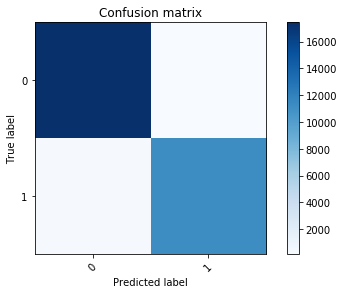

             precision    recall  f1-score   support

          0       0.98      0.99      0.99     17559
          1       0.99      0.98      0.98     11559

avg / total       0.99      0.99      0.99     29118



In [87]:
model_classification_4.load_weights(r"C:\Users\sarua\Downloads\csc215_mini\mini3\network_best_4.hdf5")

pred = model_classification_4.predict(X_tns_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)
y_true= np.argmax(y_tns_test,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, clf_lr.classes_)
plt.show()

print(classification_report(y_true, pred))

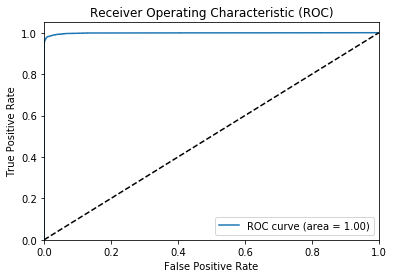

In [88]:
model_classification_4.load_weights(r"C:\Users\sarua\Downloads\csc215_mini\mini3\network_best_4.hdf5")

pred = model_classification_4.predict(X_tns_test)

pred = pred[:,1] # Only positive class (1)
plot_roc(pred,y_true)

In [90]:
checkpointer = ModelCheckpoint(filepath=r"C:\Users\sarua\Downloads\csc215_mini\mini3\network_best_5.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model_classification_5 = Sequential()
    model_classification_5.add(Dense(50,input_dim=X_tns_train.shape[1], activation='tanh')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_classification_5.add(Dense(50,activation='tanh')) # Hidden 2
    model_classification_5.add(Dense(y_tns_train.shape[1],activation='softmax')) # Output
    model_classification_5.compile(loss='categorical_crossentropy', optimizer='sgd')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification_5.fit(X_tns_train, y_tns_train,validation_data=(X_tns_test,y_tns_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)


0
Train on 116468 samples, validate on 29118 samples
Epoch 1/1000
 - 5s - loss: 0.0918 - val_loss: 0.0652
Epoch 2/1000
 - 4s - loss: 0.0538 - val_loss: 0.0526
Epoch 3/1000
 - 6s - loss: 0.0456 - val_loss: 0.0470
Epoch 4/1000
 - 5s - loss: 0.0417 - val_loss: 0.0444
Epoch 5/1000
 - 5s - loss: 0.0395 - val_loss: 0.0418
Epoch 6/1000
 - 4s - loss: 0.0378 - val_loss: 0.0406
Epoch 7/1000
 - 4s - loss: 0.0362 - val_loss: 0.0397
Epoch 8/1000
 - 4s - loss: 0.0350 - val_loss: 0.0391
Epoch 9/1000
 - 4s - loss: 0.0340 - val_loss: 0.0372
Epoch 10/1000
 - 4s - loss: 0.0328 - val_loss: 0.0356
Epoch 11/1000
 - 4s - loss: 0.0318 - val_loss: 0.0350
Epoch 12/1000
 - 4s - loss: 0.0308 - val_loss: 0.0350
Epoch 13/1000
 - 5s - loss: 0.0299 - val_loss: 0.0328
Epoch 14/1000
 - 4s - loss: 0.0290 - val_loss: 0.0328
Epoch 15/1000
 - 6s - loss: 0.0280 - val_loss: 0.0309
Epoch 16/1000
 - 7s - loss: 0.0272 - val_loss: 0.0302
Epoch 17/1000
 - 4s - loss: 0.0264 - val_loss: 0.0295
Epoch 18/1000
 - 4s - loss: 0.0256 - v

 - 8s - loss: 0.0138 - val_loss: 0.0163
Epoch 40/1000
 - 6s - loss: 0.0133 - val_loss: 0.0160
Epoch 41/1000
 - 4s - loss: 0.0129 - val_loss: 0.0172
Epoch 42/1000
 - 5s - loss: 0.0126 - val_loss: 0.0151
Epoch 43/1000
 - 5s - loss: 0.0122 - val_loss: 0.0150
Epoch 44/1000
 - 5s - loss: 0.0119 - val_loss: 0.0145
Epoch 45/1000
 - 7s - loss: 0.0117 - val_loss: 0.0138
Epoch 46/1000
 - 5s - loss: 0.0113 - val_loss: 0.0140
Epoch 47/1000
 - 7s - loss: 0.0110 - val_loss: 0.0133
Epoch 48/1000
 - 8s - loss: 0.0108 - val_loss: 0.0136
Epoch 49/1000
 - 5s - loss: 0.0106 - val_loss: 0.0143
Epoch 50/1000
 - 6s - loss: 0.0103 - val_loss: 0.0134
Epoch 00050: early stopping
3
Train on 116468 samples, validate on 29118 samples
Epoch 1/1000
 - 6s - loss: 0.0852 - val_loss: 0.0636
Epoch 2/1000
 - 5s - loss: 0.0523 - val_loss: 0.0518
Epoch 3/1000
 - 5s - loss: 0.0449 - val_loss: 0.0471
Epoch 4/1000
 - 4s - loss: 0.0414 - val_loss: 0.0436
Epoch 5/1000
 - 4s - loss: 0.0391 - val_loss: 0.0424
Epoch 6/1000
 - 5s -

Precision score : 0.9977471622909626
Recall score    : 0.9961934423393027
F1 score        : 0.9969696969696971

[[17533    26]
 [   44 11515]]

Plotting confusion matrix


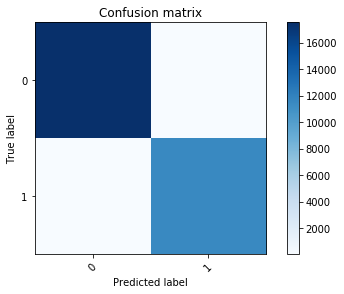

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     17559
          1       1.00      1.00      1.00     11559

avg / total       1.00      1.00      1.00     29118



In [91]:
model_classification_5.load_weights(r"C:\Users\sarua\Downloads\csc215_mini\mini3\network_best_5.hdf5")

pred = model_classification_5.predict(X_tns_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)
y_true= np.argmax(y_tns_test,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, clf_lr.classes_)
plt.show()

print(classification_report(y_true, pred))

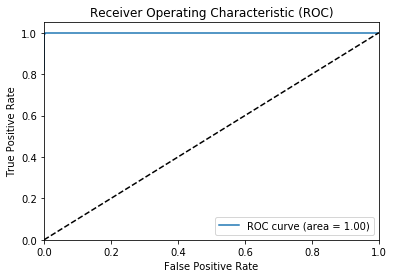

In [92]:
model_classification_5.load_weights(r"C:\Users\sarua\Downloads\csc215_mini\mini3\network_best_5.hdf5")

pred = model_classification_5.predict(X_tns_test)

pred = pred[:,1] # Only positive class (1)
plot_roc(pred,y_true)

In [93]:
checkpointer = ModelCheckpoint(filepath=r"C:\Users\sarua\Downloads\csc215_mini\mini3\network_best_6.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model_classification_6 = Sequential()
    model_classification_6.add(Dense(50,input_dim=X_tns_train.shape[1], activation='relu')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_classification_6.add(Dense(50,activation='relu')) # Hidden 2
    model_classification_6.add(Dense(y_tns_train.shape[1],activation='softmax')) # Output
    model_classification_6.compile(loss='categorical_crossentropy', optimizer='rmsprop')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification_6.fit(X_tns_train, y_tns_train,validation_data=(X_tns_test,y_tns_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)


0
Train on 116468 samples, validate on 29118 samples
Epoch 1/1000
 - 5s - loss: 0.0316 - val_loss: 0.0196
Epoch 2/1000
 - 4s - loss: 0.0157 - val_loss: 0.0191
Epoch 3/1000
 - 5s - loss: 0.0138 - val_loss: 0.0156
Epoch 4/1000
 - 5s - loss: 0.0136 - val_loss: 0.0143
Epoch 5/1000
 - 5s - loss: 0.0134 - val_loss: 0.0140
Epoch 6/1000
 - 5s - loss: 0.0133 - val_loss: 0.0141
Epoch 7/1000
 - 5s - loss: 0.0132 - val_loss: 0.0158
Epoch 8/1000
 - 4s - loss: 0.0140 - val_loss: 0.0132
Epoch 9/1000
 - 5s - loss: 0.0137 - val_loss: 0.0170
Epoch 10/1000
 - 4s - loss: 0.0141 - val_loss: 0.0159
Epoch 11/1000
 - 4s - loss: 0.0138 - val_loss: 0.0172
Epoch 12/1000
 - 4s - loss: 0.0142 - val_loss: 0.0204
Epoch 13/1000
 - 5s - loss: 0.0145 - val_loss: 0.0178
Epoch 00013: early stopping
1
Train on 116468 samples, validate on 29118 samples
Epoch 1/1000
 - 5s - loss: 0.0310 - val_loss: 0.0226
Epoch 2/1000
 - 4s - loss: 0.0143 - val_loss: 0.0145
Epoch 3/1000
 - 5s - loss: 0.0130 - val_loss: 0.0155
Epoch 4/1000
 

Precision score : 0.9983514099783081
Recall score    : 0.9954148282723418
F1 score        : 0.9968809565066713

[[17540    19]
 [   53 11506]]

Plotting confusion matrix


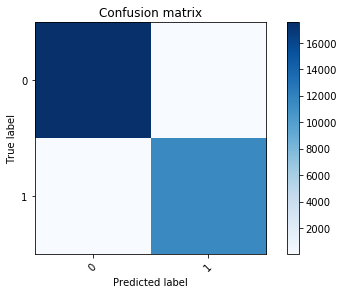

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     17559
          1       1.00      1.00      1.00     11559

avg / total       1.00      1.00      1.00     29118



In [94]:
model_classification_6.load_weights(r"C:\Users\sarua\Downloads\csc215_mini\mini3\network_best_6.hdf5")

pred = model_classification_6.predict(X_tns_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)
y_true= np.argmax(y_tns_test,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, clf_lr.classes_)
plt.show()

print(classification_report(y_true, pred))

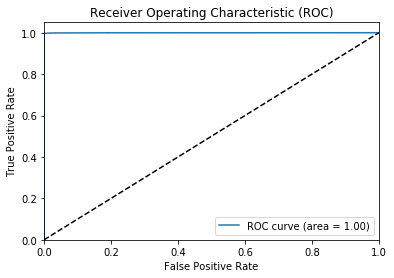

In [95]:
model_classification_6.load_weights(r"C:\Users\sarua\Downloads\csc215_mini\mini3\network_best_6.hdf5")

pred = model_classification_6.predict(X_tns_test)

pred = pred[:,1] # Only positive class (1)
plot_roc(pred,y_true)

In [96]:
checkpointer = ModelCheckpoint(filepath=r"C:\Users\sarua\Downloads\csc215_mini\mini3\network_best_7.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model_classification_7 = Sequential()
    model_classification_7.add(Dense(50,input_dim=X_tns_train.shape[1], activation='sigmoid')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_classification_7.add(Dense(50,activation='sigmoid')) # Hidden 2
    model_classification_7.add(Dense(y_tns_train.shape[1],activation='softmax')) # Output
    model_classification_7.compile(loss='categorical_crossentropy', optimizer='rmsprop')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification_7.fit(X_tns_train, y_tns_train,validation_data=(X_tns_test,y_tns_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)


0
Train on 116468 samples, validate on 29118 samples
Epoch 1/1000
 - 5s - loss: 0.0686 - val_loss: 0.0538
Epoch 2/1000
 - 5s - loss: 0.0408 - val_loss: 0.0426
Epoch 3/1000
 - 5s - loss: 0.0376 - val_loss: 0.0384
Epoch 4/1000
 - 4s - loss: 0.0358 - val_loss: 0.0389
Epoch 5/1000
 - 5s - loss: 0.0345 - val_loss: 0.0409
Epoch 6/1000
 - 4s - loss: 0.0334 - val_loss: 0.0344
Epoch 7/1000
 - 4s - loss: 0.0322 - val_loss: 0.0321
Epoch 8/1000
 - 7s - loss: 0.0294 - val_loss: 0.0307
Epoch 9/1000
 - 5s - loss: 0.0255 - val_loss: 0.0249
Epoch 10/1000
 - 4s - loss: 0.0228 - val_loss: 0.0224
Epoch 11/1000
 - 5s - loss: 0.0212 - val_loss: 0.0210
Epoch 12/1000
 - 5s - loss: 0.0198 - val_loss: 0.0198
Epoch 13/1000
 - 5s - loss: 0.0188 - val_loss: 0.0180
Epoch 14/1000
 - 5s - loss: 0.0177 - val_loss: 0.0172
Epoch 15/1000
 - 5s - loss: 0.0171 - val_loss: 0.0157
Epoch 16/1000
 - 5s - loss: 0.0165 - val_loss: 0.0154
Epoch 17/1000
 - 5s - loss: 0.0161 - val_loss: 0.0151
Epoch 18/1000
 - 5s - loss: 0.0158 - v

Precision score : 0.9971386456255961
Recall score    : 0.9948957522277013
F1 score        : 0.9960159362549801

[[17526    33]
 [   59 11500]]

Plotting confusion matrix


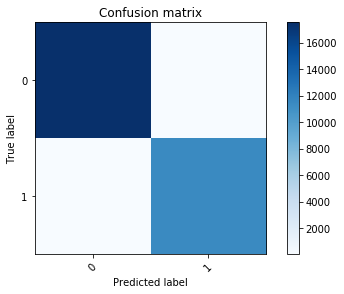

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     17559
          1       1.00      0.99      1.00     11559

avg / total       1.00      1.00      1.00     29118



In [97]:
model_classification_7.load_weights(r"C:\Users\sarua\Downloads\csc215_mini\mini3\network_best_7.hdf5")

pred = model_classification_7.predict(X_tns_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)
y_true= np.argmax(y_tns_test,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, clf_lr.classes_)
plt.show()

print(classification_report(y_true, pred))

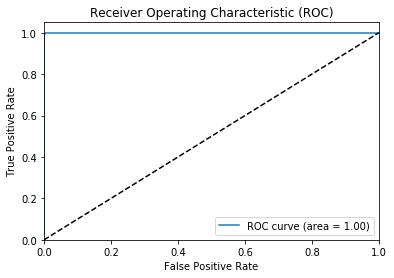

In [98]:
model_classification_7.load_weights(r"C:\Users\sarua\Downloads\csc215_mini\mini3\network_best_7.hdf5")

pred = model_classification_7.predict(X_tns_test)

pred = pred[:,1] # Only positive class (1)
plot_roc(pred,y_true)

In [99]:
checkpointer = ModelCheckpoint(filepath=r"C:\Users\sarua\Downloads\csc215_mini\mini3\network_best_8.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(3):
    print(i)
    model_classification_8 = Sequential()
    model_classification_8.add(Dense(50,input_dim=X_tns_train.shape[1], activation='tanh')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_classification_8.add(Dense(50,activation='tanh')) # Hidden 2
    model_classification_8.add(Dense(y_tns_train.shape[1],activation='softmax')) # Output
    model_classification_8.compile(loss='categorical_crossentropy', optimizer='rmsprop')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification_8.fit(X_tns_train, y_tns_train,validation_data=(X_tns_test,y_tns_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)


0
Train on 116468 samples, validate on 29118 samples
Epoch 1/1000
 - 8s - loss: 0.0414 - val_loss: 0.0319
Epoch 2/1000
 - 7s - loss: 0.0239 - val_loss: 0.0202
Epoch 3/1000
 - 7s - loss: 0.0149 - val_loss: 0.0154
Epoch 4/1000
 - 7s - loss: 0.0126 - val_loss: 0.0130
Epoch 5/1000
 - 7s - loss: 0.0116 - val_loss: 0.0134
Epoch 6/1000
 - 7s - loss: 0.0110 - val_loss: 0.0106
Epoch 7/1000
 - 7s - loss: 0.0103 - val_loss: 0.0111
Epoch 8/1000
 - 7s - loss: 0.0098 - val_loss: 0.0102
Epoch 9/1000
 - 7s - loss: 0.0094 - val_loss: 0.0097
Epoch 10/1000
 - 8s - loss: 0.0092 - val_loss: 0.0099
Epoch 11/1000
 - 7s - loss: 0.0089 - val_loss: 0.0095
Epoch 12/1000
 - 7s - loss: 0.0086 - val_loss: 0.0108
Epoch 13/1000
 - 7s - loss: 0.0090 - val_loss: 0.0109
Epoch 14/1000
 - 6s - loss: 0.0092 - val_loss: 0.0112
Epoch 15/1000
 - 7s - loss: 0.0093 - val_loss: 0.0105
Epoch 16/1000
 - 7s - loss: 0.0089 - val_loss: 0.0104
Epoch 00016: early stopping
1
Train on 116468 samples, validate on 29118 samples
Epoch 1/100

Precision score : 0.9971438462870001
Recall score    : 0.9967125183839433
F1 score        : 0.9969281356812184

[[17526    33]
 [   38 11521]]

Plotting confusion matrix


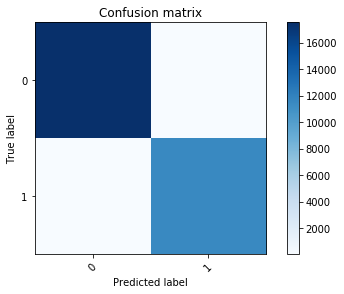

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     17559
          1       1.00      1.00      1.00     11559

avg / total       1.00      1.00      1.00     29118



In [100]:
model_classification_8.load_weights(r"C:\Users\sarua\Downloads\csc215_mini\mini3\network_best_8.hdf5")

pred = model_classification_8.predict(X_tns_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)
y_true= np.argmax(y_tns_test,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, clf_lr.classes_)
plt.show()

print(classification_report(y_true, pred))

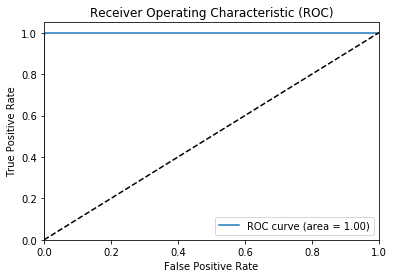

In [101]:
model_classification_8.load_weights(r"C:\Users\sarua\Downloads\csc215_mini\mini3\network_best_8.hdf5")

pred = model_classification_8.predict(X_tns_test)

pred = pred[:,1] # Only positive class (1)
plot_roc(pred,y_true)

# CNN

In [102]:
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Dropout
from keras import regularizers

In [103]:
X_tns_re_train = X_tns_train.reshape(X_tns_train.shape[0], 1, X_tns_train.shape[1], 1)
X_tns_re_test = X_tns_test.reshape(X_tns_test.shape[0], 1, X_tns_test.shape[1], 1)

In [104]:
input_shape=(1,X_tns_train.shape[1],1)

In [105]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(1, 3), strides=(1, 1),activation='relu',input_shape=input_shape,padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model.add(Conv2D(64, kernel_size=(1, 3), strides=(1, 1),activation='relu',padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model.add(Flatten())
cnn_model.add(Dense(500, activation='relu'))
cnn_model.add(Dense(y_tns_train.shape[1], activation='softmax'))
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 118, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 59, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 59, 64)         6208      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 30, 64)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_112 (Dense)            (None, 500)               960500    
_________________________________________________________________
dense_113 (Dense)            (None, 2)                 1002      
Total para

In [106]:
checkpointer = ModelCheckpoint(filepath=r"C:\Users\sarua\Downloads\csc215_mini\mini3\cnn_best.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(3):
    print(i)   
    cnn_model.compile(loss='categorical_crossentropy', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=1, mode='auto')
    cnn_model.fit(X_tns_re_train[0:5000], y_tns_train[0:5000],batch_size=128,validation_data=(X_tns_re_test[0:1000],y_tns_test[0:1000]),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)


0
Train on 5000 samples, validate on 1000 samples
Epoch 1/1000
 - 82s - loss: 0.1273 - val_loss: 0.0836
Epoch 2/1000
 - 78s - loss: 0.0469 - val_loss: 0.0626
Epoch 3/1000
 - 78s - loss: 0.0383 - val_loss: 0.1132
Epoch 4/1000
 - 75s - loss: 0.0519 - val_loss: 0.0595
Epoch 5/1000
 - 76s - loss: 0.0316 - val_loss: 0.0680
Epoch 6/1000
 - 75s - loss: 0.0303 - val_loss: 0.0478
Epoch 7/1000
 - 74s - loss: 0.0265 - val_loss: 0.0514
Epoch 8/1000
 - 74s - loss: 0.0238 - val_loss: 0.0402
Epoch 9/1000
 - 79s - loss: 0.0205 - val_loss: 0.0443
Epoch 10/1000
 - 81s - loss: 0.0184 - val_loss: 0.0301
Epoch 11/1000
 - 90s - loss: 0.0177 - val_loss: 0.0382
Epoch 12/1000
 - 90s - loss: 0.0147 - val_loss: 0.0251
Epoch 13/1000
 - 95s - loss: 0.0117 - val_loss: 0.0300
Epoch 14/1000
 - 88s - loss: 0.0118 - val_loss: 0.0184
Epoch 15/1000
 - 88s - loss: 0.0134 - val_loss: 0.0181
Epoch 16/1000
 - 101s - loss: 0.0107 - val_loss: 0.0162
Epoch 17/1000
 - 107s - loss: 0.0088 - val_loss: 0.0206
Epoch 18/1000
 - 98s -

Precision score : 0.9944670182415493
Recall score    : 0.9951552902500216
F1 score        : 0.9948110351984779

[[17495    64]
 [   56 11503]]

Plotting confusion matrix


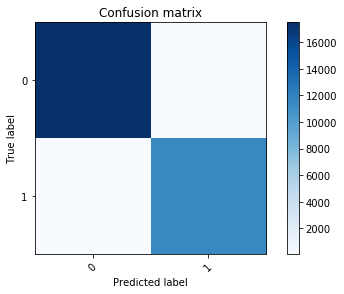

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     17559
          1       0.99      1.00      0.99     11559

avg / total       1.00      1.00      1.00     29118



In [107]:
cnn_model.load_weights(r"C:\Users\sarua\Downloads\csc215_mini\mini3\cnn_best.hdf5")

pred = cnn_model.predict(X_tns_re_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)

y_true= np.argmax(y_tns_test,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, clf_lr.classes_)
plt.show()

print(metrics.classification_report(y_true, pred))

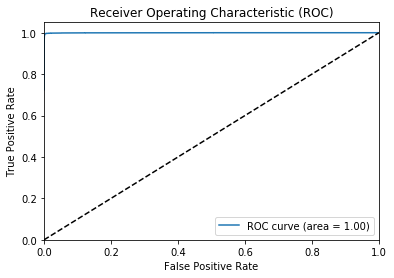

In [108]:
cnn_model.load_weights(r"C:\Users\sarua\Downloads\csc215_mini\mini3\cnn_best.hdf5")

pred = cnn_model.predict(X_tns_re_test)

pred = pred[:,1] # Only positive class (1)
plot_roc(pred,y_true)

In [109]:
cnn_model_1 = Sequential()
cnn_model_1.add(Conv2D(32, kernel_size=(1, 5), strides=(1, 1),activation='sigmoid',input_shape=input_shape,padding='same'))
cnn_model_1.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model_1.add(Conv2D(64, kernel_size=(1, 5), strides=(1, 1),activation='sigmoid',padding='same'))
cnn_model_1.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model_1.add(Flatten())
cnn_model_1.add(Dense(500, activation='sigmoid'))
cnn_model_1.add(Dense(y_tns_train.shape[1], activation='softmax'))
cnn_model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 1, 118, 32)        192       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 59, 32)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 59, 64)         10304     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 30, 64)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_114 (Dense)            (None, 500)               960500    
_________________________________________________________________
dense_115 (Dense)            (None, 2)                 1002      
Total para

In [110]:
checkpointer = ModelCheckpoint(filepath=r"C:\Users\sarua\Downloads\csc215_mini\mini3\cnn_best_1.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(2):
    print(i)   
    cnn_model_1.compile(loss='categorical_crossentropy', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-2, patience=2, verbose=1, mode='auto')
    cnn_model_1.fit(X_tns_re_train[:5000], y_tns_train[:5000],batch_size=128,validation_data=(X_tns_re_test[:1000],y_tns_test[:1000]),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)


0
Train on 5000 samples, validate on 1000 samples
Epoch 1/1000
 - 92s - loss: 0.8937 - val_loss: 0.6749
Epoch 2/1000
 - 103s - loss: 0.6756 - val_loss: 0.6788
Epoch 3/1000
 - 96s - loss: 0.6789 - val_loss: 0.6716
Epoch 00003: early stopping
1
Train on 5000 samples, validate on 1000 samples
Epoch 1/1000
 - 96s - loss: 0.6946 - val_loss: 0.6525
Epoch 2/1000
 - 902s - loss: 0.6458 - val_loss: 0.6087
Epoch 3/1000
 - 92s - loss: 0.4584 - val_loss: 0.2438
Epoch 4/1000
 - 91s - loss: 0.1591 - val_loss: 0.2084
Epoch 5/1000
 - 106s - loss: 0.1183 - val_loss: 0.1415
Epoch 6/1000
 - 107s - loss: 0.1075 - val_loss: 0.1404
Epoch 7/1000
 - 96s - loss: 0.0960 - val_loss: 0.1199
Epoch 8/1000
 - 91s - loss: 0.0877 - val_loss: 0.1609
Epoch 9/1000
 - 93s - loss: 0.0892 - val_loss: 0.1534
Epoch 00009: early stopping


Precision score : 0.9928519061583577
Recall score    : 0.9372783112726014
F1 score        : 0.9642650527346358

[[17481    78]
 [  725 10834]]

Plotting confusion matrix


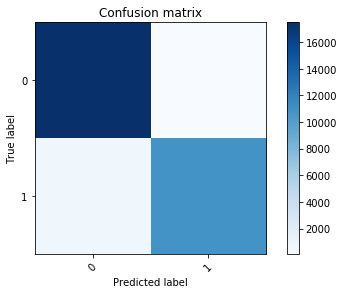

             precision    recall  f1-score   support

          0       0.96      1.00      0.98     17559
          1       0.99      0.94      0.96     11559

avg / total       0.97      0.97      0.97     29118



In [111]:
cnn_model_1.load_weights(r"C:\Users\sarua\Downloads\csc215_mini\mini3\cnn_best_1.hdf5")

pred = cnn_model_1.predict(X_tns_re_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)

y_true= np.argmax(y_tns_test,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, clf_lr.classes_)
plt.show()

print(metrics.classification_report(y_true, pred))

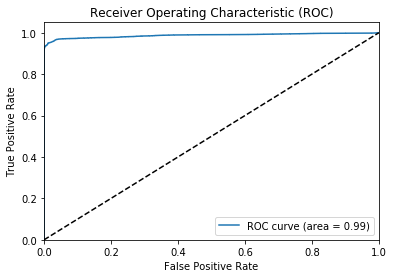

In [112]:
cnn_model_1.load_weights(r"C:\Users\sarua\Downloads\csc215_mini\mini3\cnn_best_1.hdf5")

pred = cnn_model_1.predict(X_tns_re_test)

pred = pred[:,1] # Only positive class (1)
plot_roc(pred,y_true)

In [ ]:
cnn_model_2 = Sequential()
cnn_model_2.add(Conv2D(64, kernel_size=(1, 5), strides=(1, 2),activation='relu',input_shape=input_shape,padding='same'))
cnn_model_2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model_2.add(Conv2D(128, kernel_size=(1, 5), strides=(1, 2),activation='relu',padding='same'))
cnn_model_2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model_2.add(Flatten())
cnn_model_2.add(Dense(500, activation='tanh'))
cnn_model_2.add(Dense(y_tns_train.shape[1], activation='softmax'))
cnn_model_2.summary()

In [ ]:
checkpointer = ModelCheckpoint(filepath=r"C:\Users\sarua\Downloads\csc215_mini\mini3\cnn_best_2.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(2):
    print(i)   
    cnn_model_2.compile(loss='categorical_crossentropy', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-2, patience=2, verbose=1, mode='auto')
    cnn_model_2.fit(X_tns_re_train, y_tns_train,batch_size=128,validation_data=(X_tns_re_test,y_tns_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)


In [ ]:
cnn_model_2.load_weights(r"C:\Users\sarua\Downloads\csc215_mini\mini3\cnn_best_2.hdf5")

pred = cnn_model_2.predict(X_tns_re_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)

y_true= np.argmax(y_tns_test,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score: {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score: {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score: {}".format(f1_score))


print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, clf_lr.classes_)
plt.show()

print(metrics.classification_report(y_true, pred))

In [ ]:
cnn_model_2.load_weights(r"C:\Users\sarua\Downloads\csc215_mini\mini3\cnn_best_2.hdf5")

pred = cnn_model_2.predict(X_tns_re_test)

pred = pred[:,1] # Only positive class (1)
plot_roc(pred,y_true)